In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Activation, Flatten
from keras.models import Sequential
import time

%matplotlib inline


In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()
len(x_train)

60000

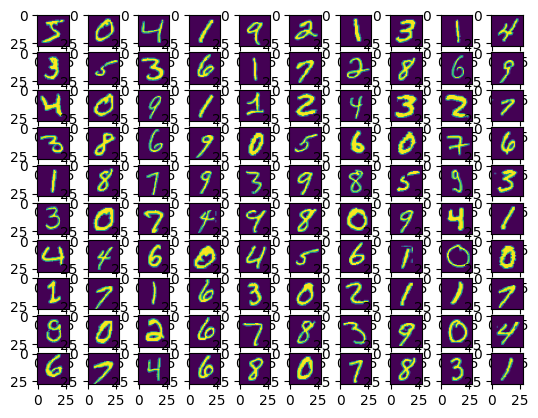

In [3]:
fig, ax = plt.subplots(10,10)
k=0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k])
        k+=1
plt.show()


In [4]:
# Normalizing the dataset
x_train = x_train/255
x_test = x_test/255

In [5]:
# Cannot cast ufunc 'divide' output from dtype('float64') to dtype('uint8') with casting rule 'same_kind'
x_train = x_train.astype('float')
x_test = x_test.astype('float')

gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

# /= use krle agei float e convert kore nite hobe

In [6]:
x_train.shape

(60000, 28, 28)

In [5]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(256,activation='sigmoid'),
    Dense(128,activation='sigmoid'),
    Dense(10,activation='sigmoid'),
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

start_time=time.time()
history = model.fit(x_train,y_train,validation_split=0.2,batch_size=100,epochs=20)
end_time=time.time()

print(f"model training time {end_time-start_time}")

result = model.evaluate(x_test,y_test,verbose=1)

print(f"Test Loss {result[0]}\nTest Accuracy {result[1]}")



Epoch 1/20


480/480 [==============================] - 3s 5ms/step - loss: 0.6194 - accuracy: 0.8404 - val_loss: 0.2672 - val_accuracy: 0.9234
Epoch 2/20
480/480 [==============================] - 2s 4ms/step - loss: 0.2421 - accuracy: 0.9292 - val_loss: 0.1985 - val_accuracy: 0.9422
Epoch 3/20
480/480 [==============================] - 2s 4ms/step - loss: 0.1804 - accuracy: 0.9460 - val_loss: 0.1635 - val_accuracy: 0.9520
Epoch 4/20
480/480 [==============================] - 2s 4ms/step - loss: 0.1422 - accuracy: 0.9573 - val_loss: 0.1392 - val_accuracy: 0.9586
Epoch 5/20
480/480 [==============================] - 2s 5ms/step - loss: 0.1131 - accuracy: 0.9665 - val_loss: 0.1212 - val_accuracy: 0.9656
Epoch 6/20
480/480 [==============================] - 2s 5ms/step - loss: 0.0913 - accuracy: 0.9737 - val_loss: 0.1062 - val_accuracy: 0.9686
Epoch 7/20
480/480 [==============================] - 2s 5ms/step - loss: 0.0746 - accuracy: 0.9782 - val_loss: 0.1052 - val_accuracy: 0.9677
Ep

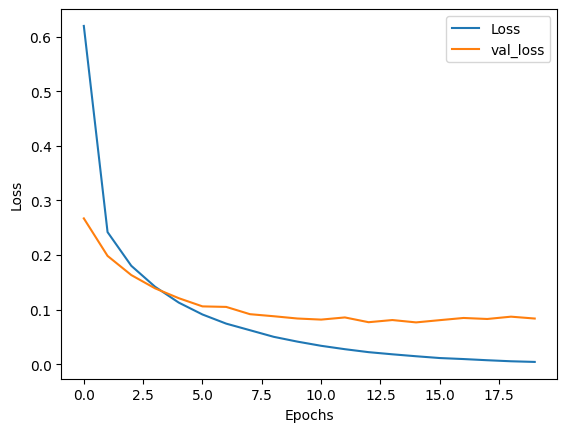

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss','val_loss'])

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

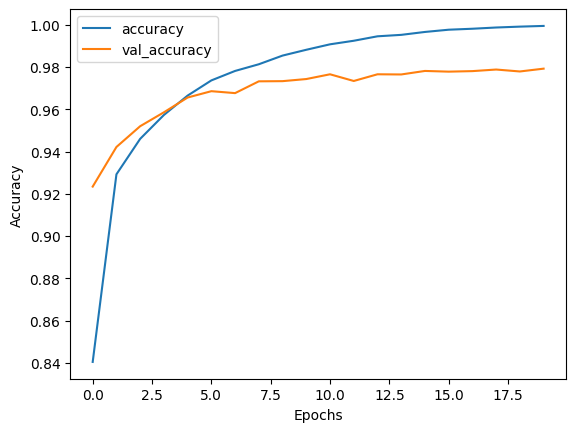

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])


plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

## Model evalutation

In [8]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, multilabel_confusion_matrix

In [24]:
y_pred = model.predict(x_test)
# here the model outputs a probability distribution over the different classes for a given input

313/313 [==============================] - 1s 2ms/step


In [25]:
y_pred[0]

array([6.5761260e-03, 1.0949255e-02, 1.8590290e-02, 5.0049955e-01,
       5.3814234e-05, 1.5295096e-03, 7.2852579e-08, 9.9999636e-01,
       1.7932183e-03, 3.9679894e-01], dtype=float32)

In [26]:
position = y_pred[0].argmax()
# argmax return the index of the max value
position

7

In [27]:
value = np.argmax(y_pred[0],axis=0)
value

7

In [28]:
# Convert predictions and true labels to class labels
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [29]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [31]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 89.88%


In [32]:
# Calculate precision
precision = precision_score(y_test, y_pred_classes, average='weighted')
print(f'Precision: {precision * 100:.2f}%')

Precision: 90.08%


In [33]:
# Calculate recall
recall = recall_score(y_test, y_pred_classes, average='weighted')
print(f'Recall: {recall * 100:.2f}%')

Recall: 89.88%


In [59]:
# Calculate confusion matrix
conf_matrix = multilabel_confusion_matrix(y_test, y_pred, labels = np.unique(y_test))
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[[8945   75]
  [  27  953]]

 [[8819   46]
  [  35 1100]]

 [[8912   56]
  [ 184  848]]

 [[8863  127]
  [ 121  889]]

 [[8923   95]
  [  86  896]]

 [[8925  183]
  [ 109  783]]

 [[8980   62]
  [  78  880]]

 [[8931   41]
  [ 130  898]]

 [[8863  163]
  [ 141  833]]

 [[8827  164]
  [ 101  908]]]


In [ ]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(256,activation='sigmoid'),
    Dense(128,activation='sigmoid'),
    Dense(10,activation='sigmoid'),
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

start_time=time.time()
history = model.fit(x_train,y_train,validation_split=0.2,batch_size=48000,epochs=200)
end_time=time.time()

print(f"model training time {end_time-start_time}")

result = model.evaluate(x_test,y_test,verbose=1)

print(f"Test Loss {result[0]}\nTest Accuracy {result[1]}")

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss','val_loss'])

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])


plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()